In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_excel(r'C:\Users\User\Desktop\E Commerce Dataset.xlsx')

In [3]:
data.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


In [4]:
data.describe(include='all')

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000
unique,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,0.168384
std,1625.385339,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,0.374240
min,50001.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,0.000000
50%,52815.500000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,0.000000
75%,54222.750000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,0.000000


In [5]:
data = data.drop('CustomerID',axis=1)

In [6]:
data.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


In [7]:
data.isnull().sum()

Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
Churn                            0
dtype: int64

In [8]:
for i in data:
    if data[i].dtypes == object:
        data[i] = data[i].fillna(value=data[i].mode()[0])
    else:
        data[i] = data[i].fillna(value=data[i].mean())

In [9]:
data.isnull().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [10]:
data.duplicated().sum()

556

In [11]:
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


In [14]:
data.dtypes

Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
Churn                            int64
dtype: object

In [15]:
abs(data.corr()['Churn']*100)

Tenure                          32.950949
CityTier                         9.815929
WarehouseToHome                  7.031629
HourSpendOnApp                   1.277130
NumberOfDeviceRegistered        11.678792
SatisfactionScore               10.086749
NumberOfAddress                  5.208585
Complain                        24.873756
OrderAmountHikeFromlastYear      2.249630
CouponUsed                       0.225615
OrderCount                       2.142079
DaySinceLastOrder               14.718645
CashbackAmount                  14.318145
Churn                          100.000000
Name: Churn, dtype: float64

In [16]:
data = data.drop(data[['CityTier','WarehouseToHome','HourSpendOnApp',
                       'NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount']],axis=1)

In [17]:
data.head()

,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,4.000000,Mobile Phone,Debit Card,Female,3,Laptop & Accessory,2,Single,1,5.0,159.93,1
1,10.189899,Phone,UPI,Male,4,Mobile,3,Single,1,0.0,120.90,1
2,10.189899,Phone,Debit Card,Male,4,Mobile,3,Single,1,3.0,120.28,1
3,0.000000,Phone,Debit Card,Male,4,Laptop & Accessory,5,Single,0,3.0,134.07,1
4,0.000000,Phone,CC,Male,3,Mobile,5,Single,0,3.0,129.60,1


In [18]:
abs(data.corr()['Churn']*100)

Tenure                       32.950949
NumberOfDeviceRegistered     11.678792
SatisfactionScore            10.086749
Complain                     24.873756
DaySinceLastOrder            14.718645
CashbackAmount               14.318145
Churn                       100.000000
Name: Churn, dtype: float64

In [19]:
data.dtypes

Tenure                      float64
PreferredLoginDevice         object
PreferredPaymentMode         object
Gender                       object
NumberOfDeviceRegistered      int64
PreferedOrderCat             object
SatisfactionScore             int64
MaritalStatus                object
Complain                      int64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
dtype: object

In [20]:
colls = []

for col in data.columns[:-1]:
    if data[col].dtypes != 'object':
        colls.append(col)

        
colls

['Tenure',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[[
 #'Tenure',
 'NumberOfDeviceRegistered',
 #'SatisfactionScore',
 #'Complain',
 #'DaySinceLastOrder',
 'CashbackAmount']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [22]:
vif

,VIF,Features
0,8.338896,NumberOfDeviceRegistered
1,8.338896,CashbackAmount


In [23]:
data = data.drop(data[['Tenure','SatisfactionScore','Complain','DaySinceLastOrder']],axis=1)

In [24]:
data.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,CashbackAmount,Churn
0,Mobile Phone,Debit Card,Female,3,Laptop & Accessory,Single,159.93,1
1,Phone,UPI,Male,4,Mobile,Single,120.90,1
2,Phone,Debit Card,Male,4,Mobile,Single,120.28,1
3,Phone,Debit Card,Male,4,Laptop & Accessory,Single,134.07,1
4,Phone,CC,Male,3,Mobile,Single,129.60,1


In [25]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    2515
Computer        1457
Phone           1102
Name: PreferredLoginDevice, dtype: int64

In [26]:
data.describe(include='all')

,PreferredLoginDevice,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,CashbackAmount,Churn
count,5074,5074,5074,5074.000000,5074,5074,5074.000000,5074.000000
unique,3,7,2,NaN,6,3,NaN,NaN
top,Mobile Phone,Debit Card,Male,NaN,Laptop & Accessory,Married,NaN,NaN
freq,2515,2099,3048,NaN,1847,2673,NaN,NaN
mean,NaN,NaN,NaN,3.686244,NaN,NaN,177.639450,0.165747
std,NaN,NaN,NaN,1.029670,NaN,NaN,49.385904,0.371890
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,145.915000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,163.870000,0.000000
75%,NaN,NaN,NaN,4.000000,NaN,NaN,197.950000,0.000000


In [27]:
#data = pd.get_dummies(data,drop_first=True)

In [28]:
colls = []

for col in data.columns[:-1]:
    if data[col].dtypes != 'object':
        colls.append(col)

        
colls

['NumberOfDeviceRegistered', 'CashbackAmount']

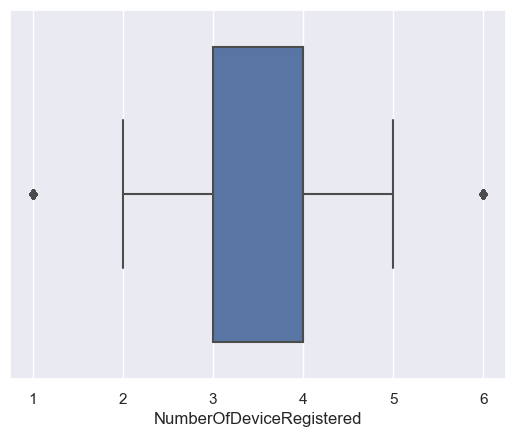

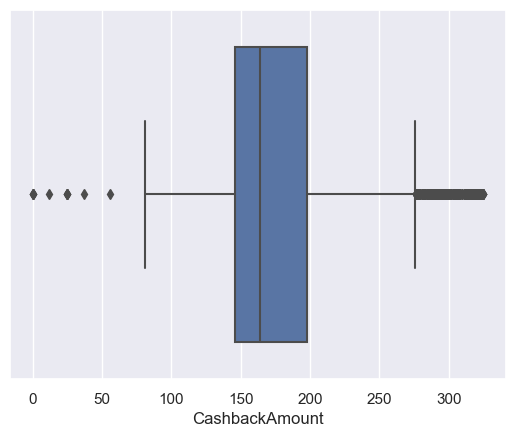

In [29]:
for i in data[['NumberOfDeviceRegistered', 'CashbackAmount']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [30]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [31]:
for i in data[['NumberOfDeviceRegistered', 'CashbackAmount']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

In [32]:
data = pd.get_dummies(data,drop_first=True)

In [33]:
data

,NumberOfDeviceRegistered,CashbackAmount,Churn,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,3.0,159.93,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,4.0,120.90,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,4.0,120.28,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,4.0,134.07,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,3.0,129.60,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,4.0,224.36,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
5624,5.0,154.66,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5626,5.0,224.91,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5627,2.0,186.42,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


In [35]:
data.isnull().sum()

NumberOfDeviceRegistered                 0
CashbackAmount                           0
Churn                                    0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
Gender_Male                              0
PreferedOrderCat_Grocery                 0
PreferedOrderCat_Laptop & Accessory      0
PreferedOrderCat_Mobile                  0
PreferedOrderCat_Mobile Phone            0
PreferedOrderCat_Others                  0
MaritalStatus_Married                    0
MaritalStatus_Single                     0
dtype: int64

In [37]:
X = data.drop('Churn',axis=1)
y = data['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

# Logistic Regression

In [41]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 44.13089560148384
[[860   7]
 [131  17]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       867
           1       0.71      0.11      0.20       148

    accuracy                           0.86      1015
   macro avg       0.79      0.55      0.56      1015
weighted avg       0.84      0.86      0.82      1015



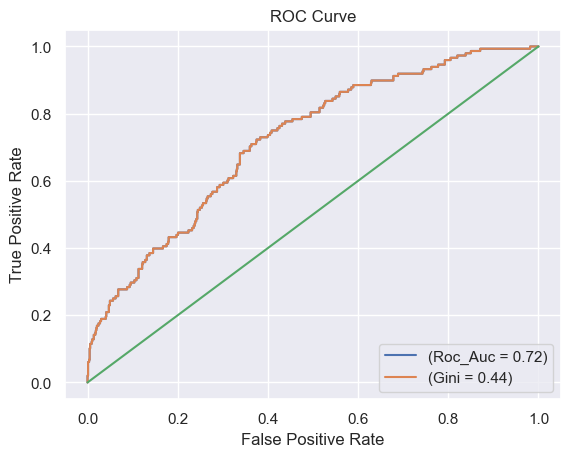

In [43]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Random Forest

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [46]:
result = evaluate(rfc, X_test, y_test)

Model Performance
Gini prob is 75.03195236759251
[[820  47]
 [ 58  90]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       867
           1       0.66      0.61      0.63       148

    accuracy                           0.90      1015
   macro avg       0.80      0.78      0.79      1015
weighted avg       0.89      0.90      0.89      1015



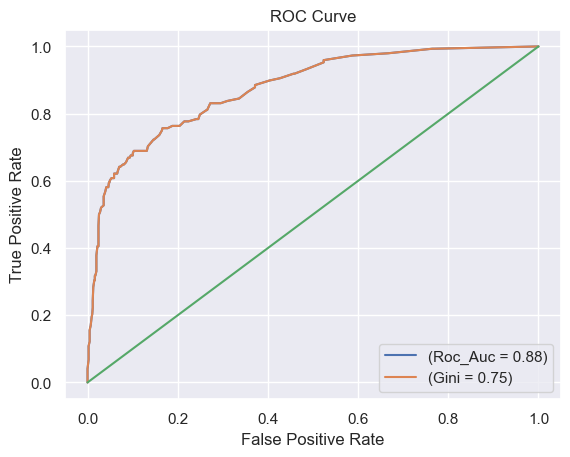

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = rfc.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Random Forest Optimized

In [48]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [49]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [50]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [51]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    return gini_prob

In [52]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 71.35898874653199


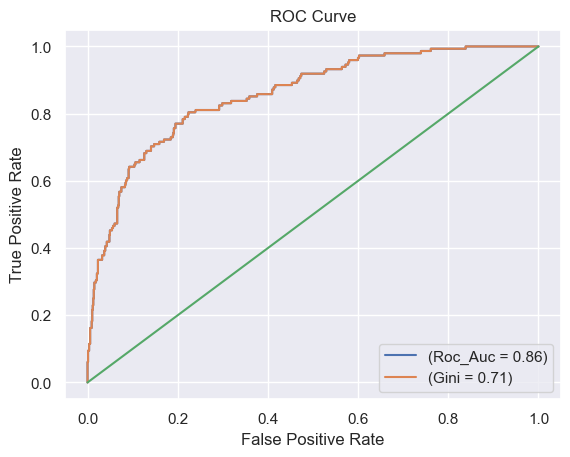

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
sns.set()

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    accuracy = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sensitivity = recall_score(y_test, y_pred)
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    
    print('Model Performance')
    
    print('Gini prob is', gini_prob*100)
    
    print('Accuracy is', accuracy*100)
    
    print('Confusion Matrix:', cm)
    
    print('Sensitivity is', sensitivity*100)
    print('Specificity is', specificity*100)

In [56]:
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini prob is 27.83674678138346
Accuracy is 85.41871921182266
Confusion Matrix: [[867   0]
 [148   0]]
Sensitivity is 0.0
Specificity is 100.0


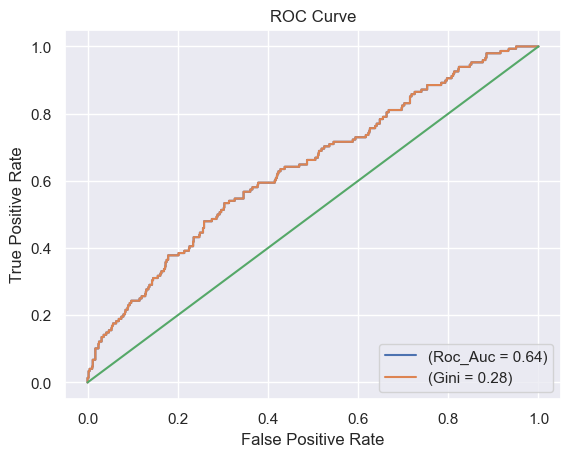

In [57]:
 from sklearn.metrics import roc_curve

y_prob_test = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector Optimized

In [58]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [59]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [60]:
svc_random.best_params_

{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 10}

In [61]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 0.0
Accuracy is 85.41871921182266
Confusion Matrix: [[867   0]
 [148   0]]
Sensitivity is 0.0
Specificity is 100.0


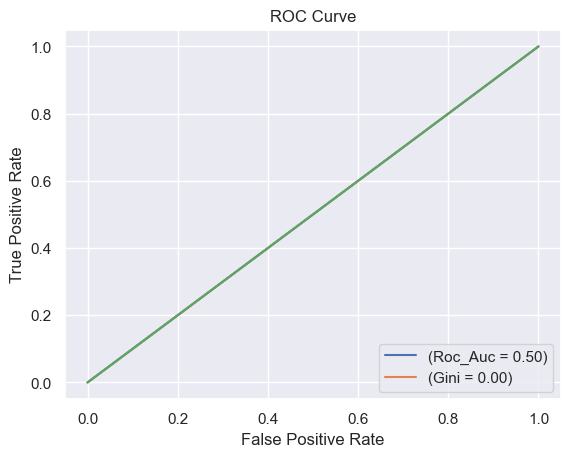

In [62]:
from sklearn.metrics import roc_curve

y_prob_test = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# CatBoost

In [63]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [64]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.018738
0:	learn: 0.6833013	total: 134ms	remaining: 2m 13s
1:	learn: 0.6720366	total: 140ms	remaining: 1m 9s
2:	learn: 0.6604500	total: 147ms	remaining: 48.7s
3:	learn: 0.6494519	total: 154ms	remaining: 38.3s
4:	learn: 0.6393883	total: 160ms	remaining: 31.9s
5:	learn: 0.6290898	total: 169ms	remaining: 28s
6:	learn: 0.6198227	total: 175ms	remaining: 24.9s
7:	learn: 0.6115309	total: 182ms	remaining: 22.6s
8:	learn: 0.6027348	total: 187ms	remaining: 20.6s
9:	learn: 0.5948328	total: 191ms	remaining: 18.9s
10:	learn: 0.5863050	total: 200ms	remaining: 18s
11:	learn: 0.5788999	total: 207ms	remaining: 17s
12:	learn: 0.5721683	total: 215ms	remaining: 16.3s
13:	learn: 0.5654444	total: 225ms	remaining: 15.9s
14:	learn: 0.5593371	total: 231ms	remaining: 15.2s
15:	learn: 0.5527555	total: 237ms	remaining: 14.6s
16:	learn: 0.5464560	total: 245ms	remaining: 14.2s
17:	learn: 0.5405750	total: 253ms	remaining: 13.8s
18:	learn: 0.5347162	total: 261ms	remaining: 13.5s
19:	learn: 0.528

In [65]:
catboost_model = CatBoostClassifier()

In [66]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.018738
0:	learn: 0.6833013	total: 4.46ms	remaining: 4.45s
1:	learn: 0.6720366	total: 11.3ms	remaining: 5.63s
2:	learn: 0.6604500	total: 18.9ms	remaining: 6.28s
3:	learn: 0.6494519	total: 27ms	remaining: 6.72s
4:	learn: 0.6393883	total: 36.2ms	remaining: 7.2s
5:	learn: 0.6290898	total: 44.2ms	remaining: 7.31s
6:	learn: 0.6198227	total: 50.9ms	remaining: 7.21s
7:	learn: 0.6115309	total: 59.1ms	remaining: 7.33s
8:	learn: 0.6027348	total: 70ms	remaining: 7.7s
9:	learn: 0.5948328	total: 79.6ms	remaining: 7.88s
10:	learn: 0.5863050	total: 87.2ms	remaining: 7.84s
11:	learn: 0.5788999	total: 94.5ms	remaining: 7.78s
12:	learn: 0.5721683	total: 101ms	remaining: 7.63s
13:	learn: 0.5654444	total: 107ms	remaining: 7.56s
14:	learn: 0.5593371	total: 111ms	remaining: 7.3s
15:	learn: 0.5527555	total: 115ms	remaining: 7.05s
16:	learn: 0.5464560	total: 117ms	remaining: 6.79s
17:	learn: 0.5405750	total: 120ms	remaining: 6.55s
18:	learn: 0.5347162	total: 123ms	remaining: 6.34s
19:	le

In [67]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 65.14620156488671
Accuracy is 87.78325123152709
Confusion Matrix: [[846  21]
 [103  45]]
Sensitivity is 30.405405405405407
Specificity is 97.57785467128028


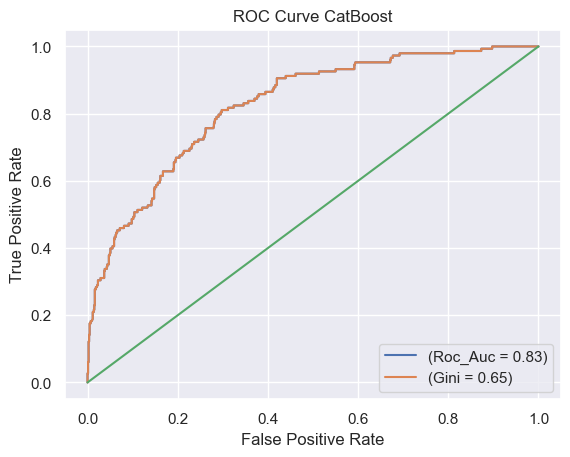

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

# Catboost Optimized

In [69]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7),}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [70]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6878713	total: 1.86ms	remaining: 1.86s
1:	learn: 0.6824576	total: 4.05ms	remaining: 2.02s
2:	learn: 0.6771270	total: 6.24ms	remaining: 2.07s
3:	learn: 0.6715414	total: 8.45ms	remaining: 2.1s
4:	learn: 0.6661682	total: 10.7ms	remaining: 2.12s
5:	learn: 0.6611014	total: 12.5ms	remaining: 2.08s
6:	learn: 0.6554893	total: 14.4ms	remaining: 2.04s
7:	learn: 0.6507384	total: 16.4ms	remaining: 2.04s
8:	learn: 0.6460810	total: 18.4ms	remaining: 2.02s
9:	learn: 0.6413342	total: 20ms	remaining: 1.98s
10:	learn: 0.6364438	total: 21.8ms	remaining: 1.96s
11:	learn: 0.6317322	total: 23.9ms	remaining: 1.96s
12:	learn: 0.6269001	total: 26.1ms	remaining: 1.98s
13:	learn: 0.6225617	total: 28.5ms	remaining: 2s
14:	learn: 0.6182455	total: 30.5ms	remaining: 2s
15:	learn: 0.6139080	total: 33.3ms	remaining: 2.05s
16:	learn: 0.6095747	total: 35.4ms	remaining: 2.04s
17:	learn: 0.6055827	total: 37.4ms	remaining: 2.04s
18:	learn: 0.6018226	total: 39.4ms	remaining: 2.03s
19:	learn: 0.5979952	total: 41.

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000174220A58B0>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [71]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [72]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 48.14052807132392
Accuracy is 86.30541871921183
Confusion Matrix: [[857  10]
 [129  19]]
Sensitivity is 12.837837837837837
Specificity is 98.84659746251442


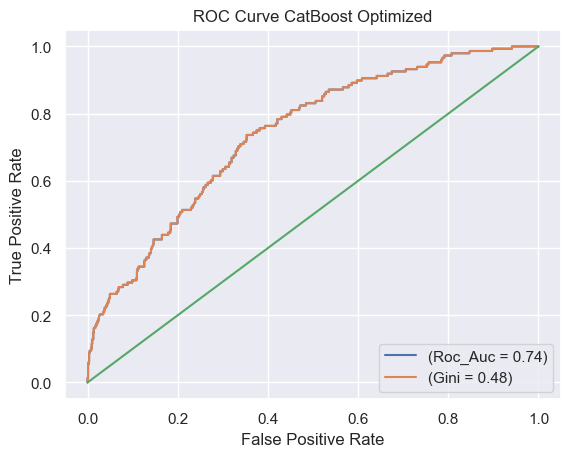

In [73]:
from sklearn.metrics import roc_curve

y_prob = optimized_model_cb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost Optimized')

plt.legend(loc='lower right')
plt.show()

# XGB Model

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_xgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 71.64188409863151
Accuracy is 87.78325123152709
Confusion Matrix: [[823  44]
 [ 80  68]]
Sensitivity is 45.94594594594595
Specificity is 94.92502883506344


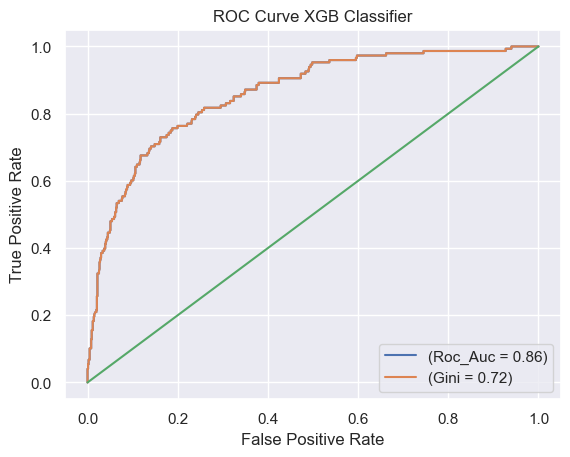

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

# XGB Optimized

In [78]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), 
   
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [79]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,

In [80]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [81]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 46.31456716231801
Accuracy is 86.79802955665025
Confusion Matrix: [[859   8]
 [126  22]]
Sensitivity is 14.864864864864865
Specificity is 99.07727797001154


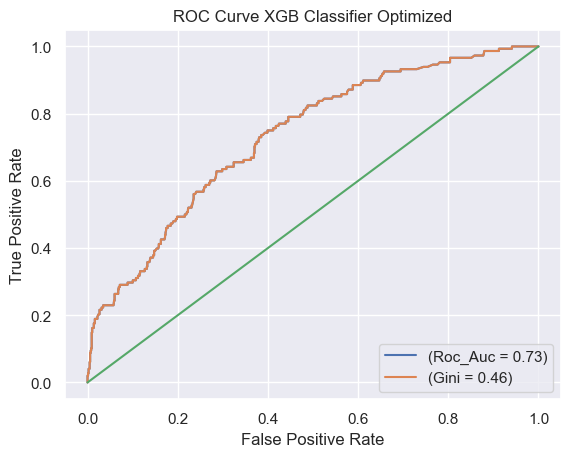

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_xgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

# LGB Model

In [83]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 693, number of negative: 3366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 4059, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170732 -> initscore=-1.580450
[LightGBM] [Info] Start training from score -1.580450


LGBMClassifier()

In [84]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 66.88176065338696
Accuracy is 86.4039408866995
Confusion Matrix: [[832  35]
 [103  45]]
Sensitivity is 30.405405405405407
Specificity is 95.96309111880046


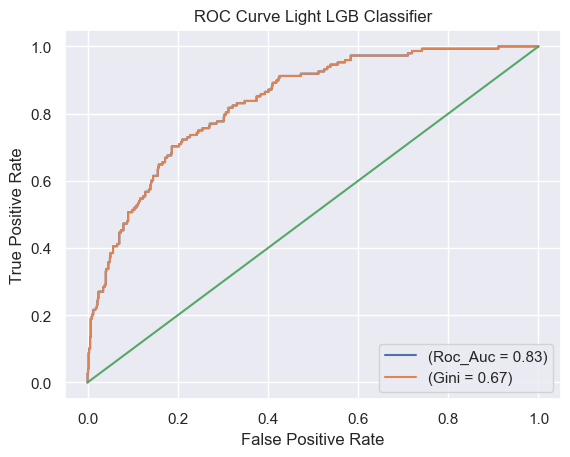

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier')

plt.legend(loc='lower right')
plt.show()

# LGB Optimized

In [86]:

from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [87]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 693, number of negative: 3366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 4059, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170732 -> initscore=-1.580450
[LightGBM] [Info] Start training from score -1.580450


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [88]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [89]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)

Model Performance
Gini prob is 37.26659185136691
Accuracy is 85.41871921182266
Confusion Matrix: [[867   0]
 [148   0]]
Sensitivity is 0.0
Specificity is 100.0


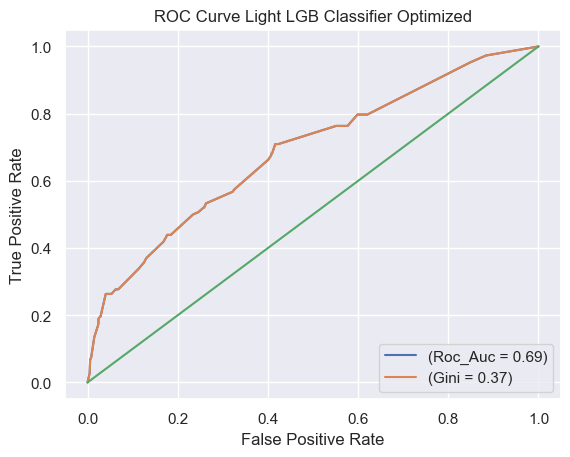

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_lgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

Random Forest is best Model for this Churn Analysis